In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
url='https://raw.githubusercontent.com/galendal/MAT100-datascience/main/content/Florida_2024-08-12_2024-08-26_1724672927.csv'

df= pd.read_csv(url)
df['tid']=pd.to_datetime(df['Dato'] + ' ' + df['Tid'])
df=df.set_index('tid')
df

,Dato,Tid,Vindretning,Vindstyrke,Vindkast
tid,,,,,
2024-08-12 00:00:00,2024-08-12,00:00,139.0,1.6,2.7
2024-08-12 00:10:00,2024-08-12,00:10,137.0,1.9,2.7
2024-08-12 00:20:00,2024-08-12,00:20,141.0,1.9,2.7
2024-08-12 00:30:00,2024-08-12,00:30,143.0,1.8,2.7
2024-08-12 00:40:00,2024-08-12,00:40,153.0,2.3,3.3
...,...,...,...,...,...
2024-08-25 23:10:00,2024-08-25,23:10,139.0,6.1,11.0
2024-08-25 23:20:00,2024-08-25,23:20,139.0,6.7,11.3
2024-08-25 23:30:00,2024-08-25,23:30,140.0,7.1,11.9


In [117]:
df.describe()

,Vindretning,Vindstyrke,Vindkast
count,2012.000000,2012.000000,2012.000000
mean,173.486074,28.141824,20.769071
std,314.256569,497.848971,385.736521
min,4.000000,0.000000,0.000000
25%,140.000000,2.000000,3.600000
50%,150.000000,3.100000,5.400000
75%,162.000000,4.500000,7.800000
max,9999.990000,9999.990000,9999.990000


<Axes: xlabel='tid'>

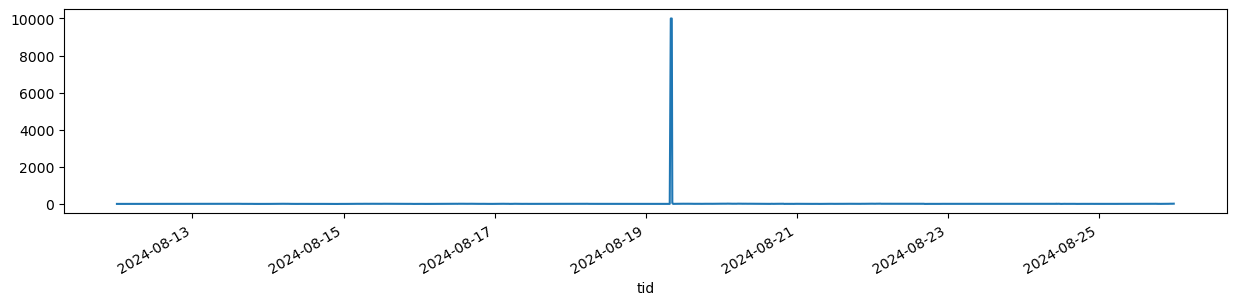

In [118]:

df.Vindkast.plot(figsize=(15, 3))

Manglende data, 9999.99 -> NaN

<Axes: xlabel='tid'>

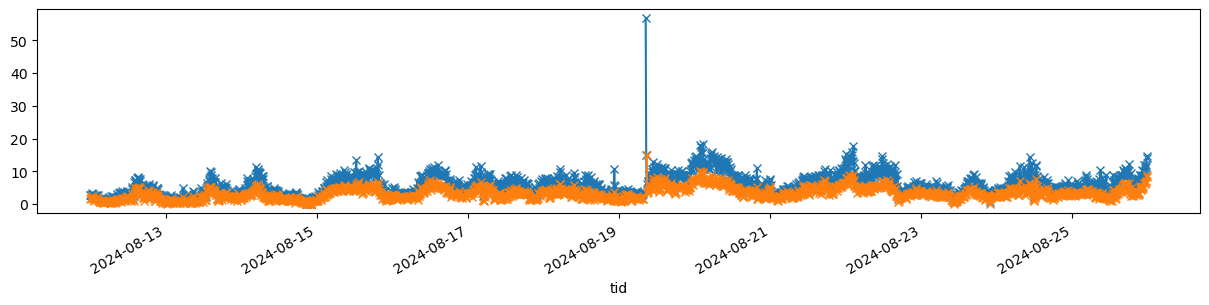

In [119]:
df.replace(9999.99, np.nan, inplace=True)
df.Vindkast.plot(marker='x',figsize=(15, 3))
df.Vindstyrke.plot(marker='x',figsize=(15, 3))

In [120]:
df.describe()

,Vindretning,Vindstyrke,Vindkast
count,2010.000000,2007.000000,2009.000000
mean,163.708458,3.299153,5.867297
std,51.305472,1.753462,3.262385
min,4.000000,0.000000,0.000000
25%,140.000000,2.000000,3.600000
50%,150.000000,3.100000,5.400000
75%,162.000000,4.400000,7.800000
max,360.000000,14.900000,56.700000


Uteligger: sett den til NaN. 

In [122]:
df_remove=df#.copy()
df_remove.loc[df['Vindkast'] > 20] = np.nan

In [124]:
df.describe()

,Vindretning,Vindstyrke,Vindkast
count,2009.000000,2007.000000,2008.000000
mean,163.754107,3.299153,5.841982
std,51.277400,1.753462,3.059468
min,4.000000,0.000000,0.000000
25%,140.000000,2.000000,3.600000
50%,150.000000,3.100000,5.400000
75%,162.000000,4.400000,7.800000
max,360.000000,14.900000,18.200000


<Axes: xlabel='tid'>

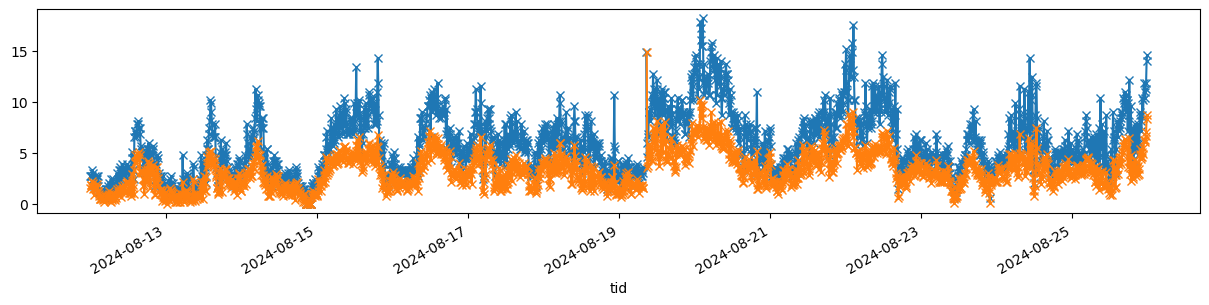

In [125]:

df_remove.Vindkast.plot(marker='x',figsize=(15, 3))
df_remove.Vindstyrke.plot(marker='x',figsize=(15, 3))

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_75232/3731546260.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(df.index[i], 0,  np.cos(directions_rad[i]), np.sin(directions_rad[i]),


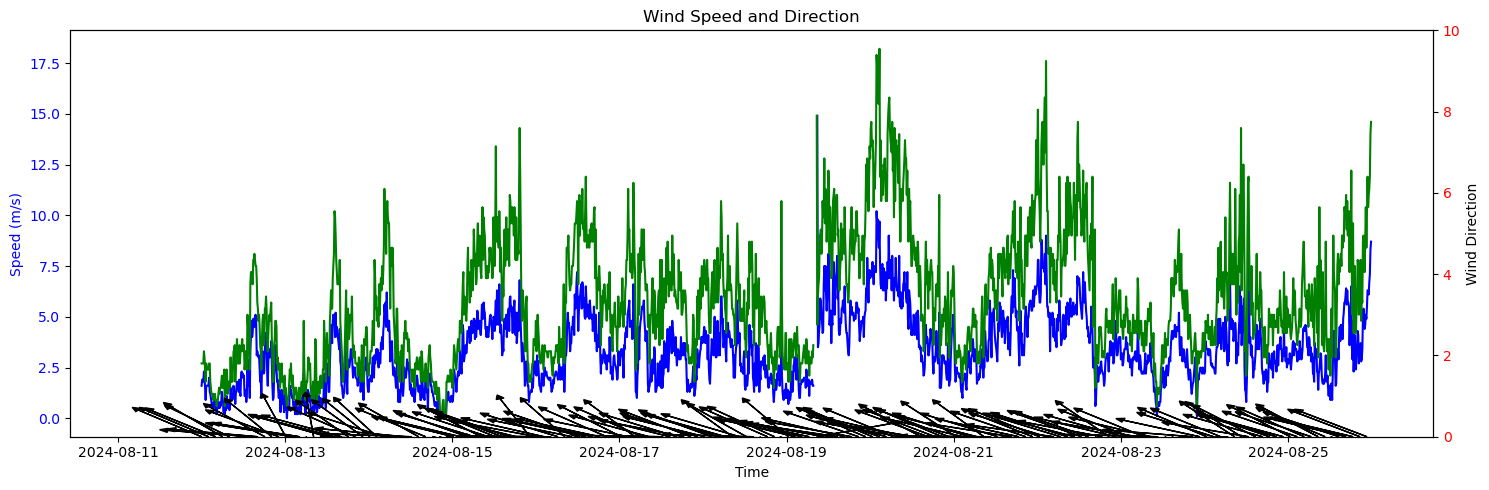

In [93]:
# Plotting wind speed as a line
fig, ax1 = plt.subplots(figsize=(15, 5))

ax1.plot( df['Vindstyrke'], 'b-', label='Vindstyrke')
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed (m/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.plot( df['Vindkast'], 'g-', label='Vind kast')

# Plotting wind direction as arrows
ax2 = ax1.twinx()
ax2.set_ylabel('Wind Direction')

# Convert direction to radians for plotting
directions_rad = np.deg2rad(df['Vindretning'])

# Plot arrows
for i in range(0, len(df), 12):
    ax2.arrow(df.index[i], 0,  np.cos(directions_rad[i]), np.sin(directions_rad[i]),
              head_width=0.1, head_length=  0.1, fc='k', ec='k')
ax2.set_ylim(0, 10)
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Wind Speed and Direction')
fig.tight_layout()
plt.show()


### Floating mean




<Axes: xlabel='tid'>

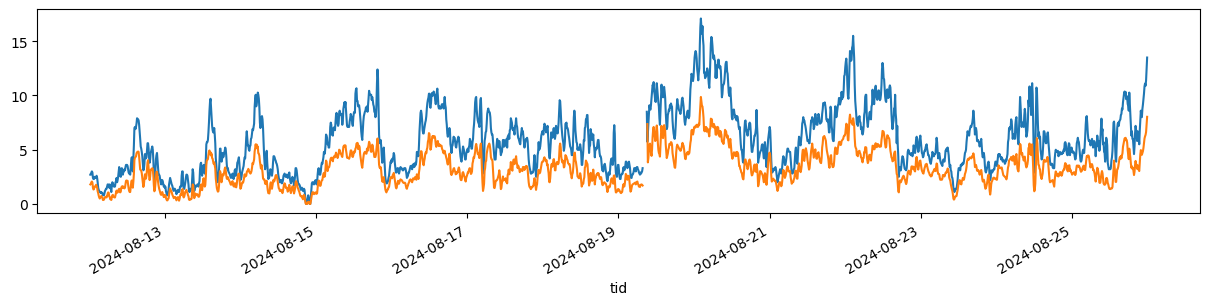

In [126]:
window =3
df.Vindkast.rolling(window=window).mean().plot(figsize=(15, 3))
df.Vindstyrke.rolling(window=window).mean().plot(figsize=(15, 3))

### Scatter plot


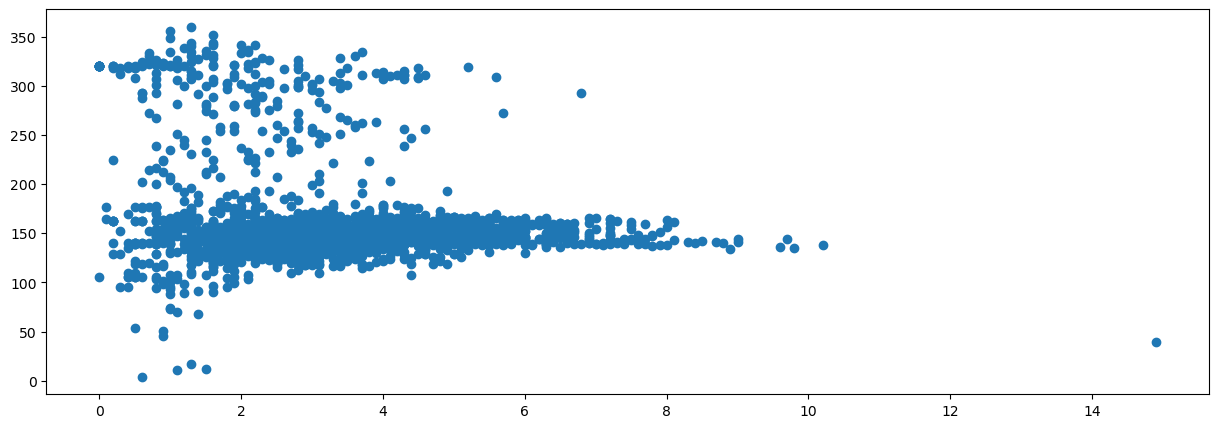

In [111]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.scatter(df.Vindstyrke,df.Vindretning)

<Axes: >

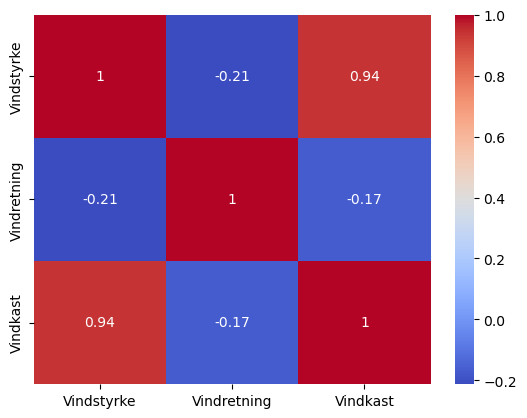

In [135]:
sns.heatmap(df[['Vindstyrke','Vindretning','Vindkast']].corr(), annot=True, cmap='coolwarm')

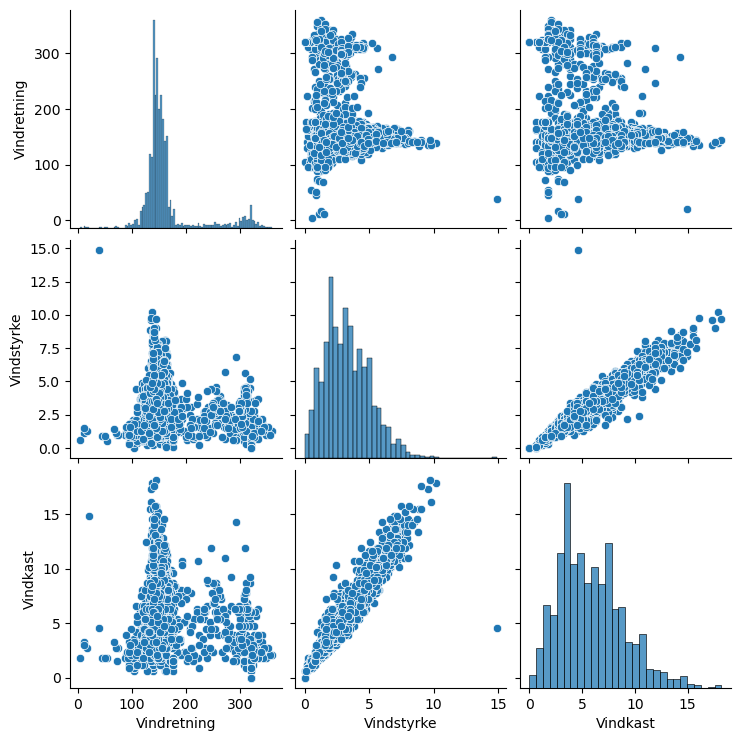

In [136]:
sns.pairplot(df)

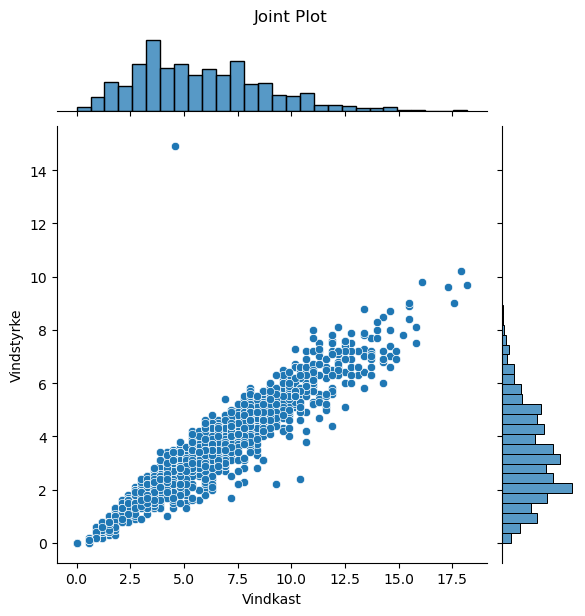

In [138]:
sns.jointplot(x='Vindkast', y='Vindstyrke', data=df, kind='scatter')
plt.suptitle('Joint Plot', y=1.02)
plt.show()

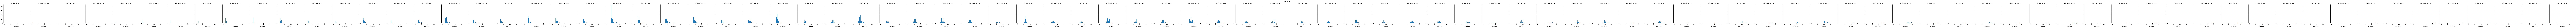